# Load Downloaded Model

In [1]:
import torch

model = torch.load("model.pth", map_location=torch.device('cpu'))
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Display Images

In [2]:
import os
datasetDir = "Nov10"
dataset = list(os.listdir(datasetDir))
dataset

['01.png', '02.png']

In [3]:
from PIL import Image

PIL_Images = []

for data in dataset:
    image = Image.open(os.path.join(datasetDir, data))
    if image.format != "JPEG":
        image = image.convert("RGB")
        PIL_Images.append(image)
    else:
        PIL_Images.append(image)

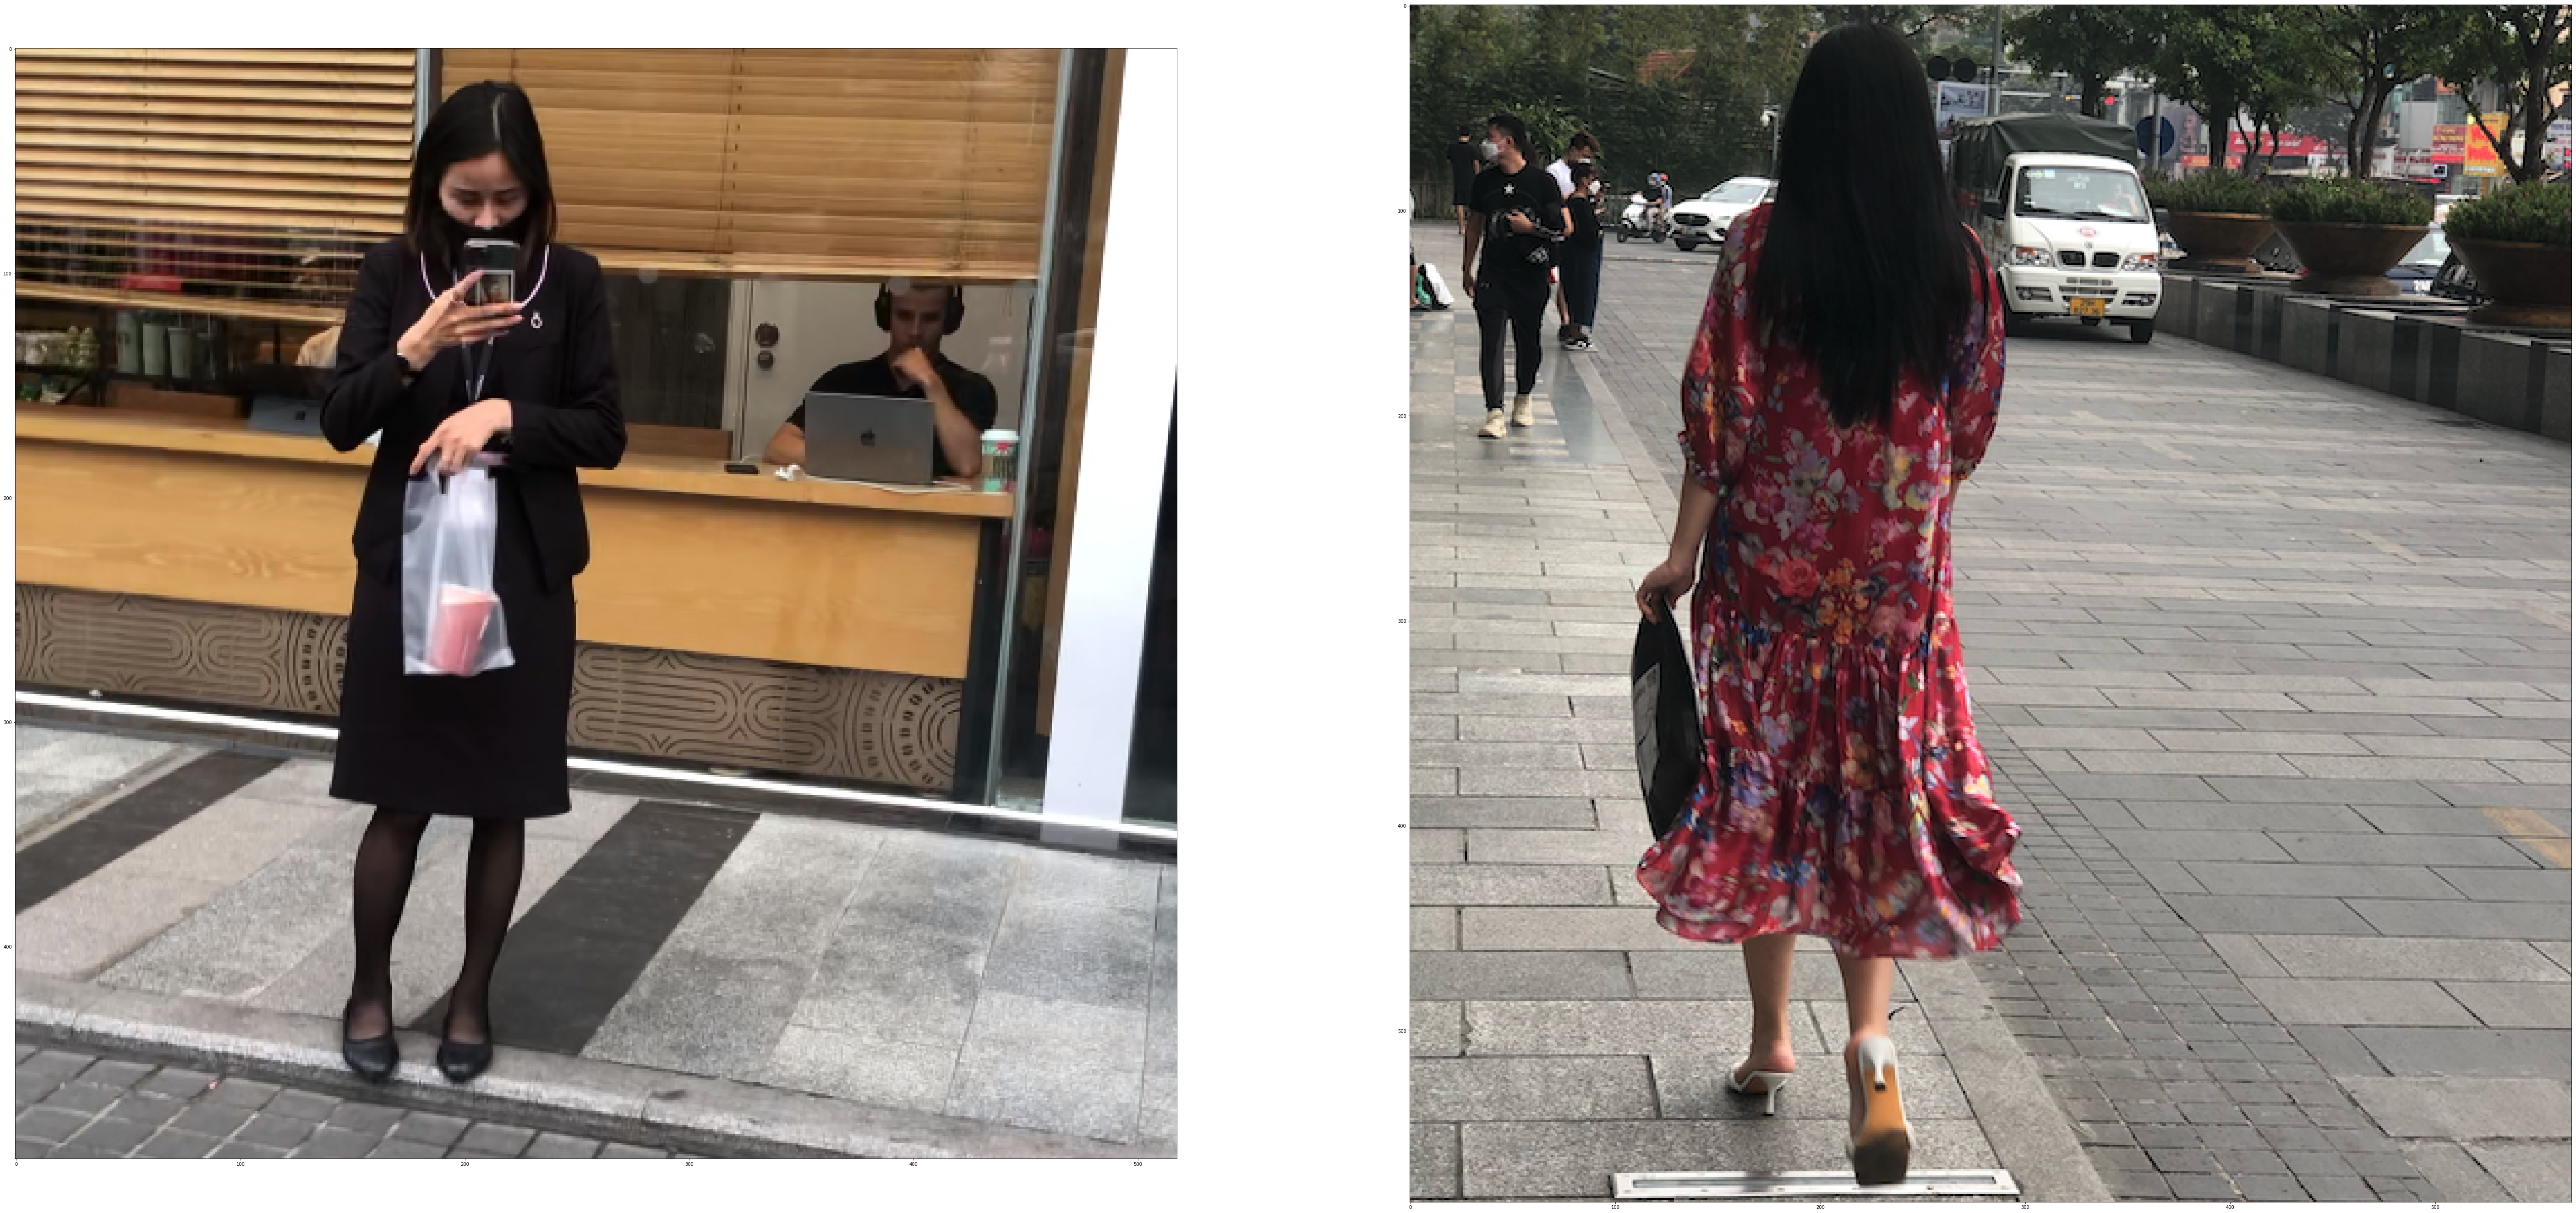

In [8]:
from matplotlib import pyplot as plt
import math

def Plot(Images):
    count = len(Images)

    nrows = math.ceil(count/2)
    ncols = 2

    fig, axis = plt.subplots(nrows=nrows, ncols=ncols, squeeze=False)
    fig.set_figheight(100)
    fig.set_figwidth(100)

    for idx, image in enumerate(Images):
        row = math.floor(idx/2)
        col = idx % 2
        cell = axis[row, col]
        cell.imshow(image)

Plot(PIL_Images)

# Make Predictions on Loaded Model

In [5]:
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
weights = MaskRCNN_ResNet50_FPN_Weights.COCO_V1
transforms = weights.transforms()

In [6]:
masks = []
for image in PIL_Images:
    input_image = transforms(image)
    prediction = model([input_image.to("cpu")])
    mask = Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())
    masks.append(mask)

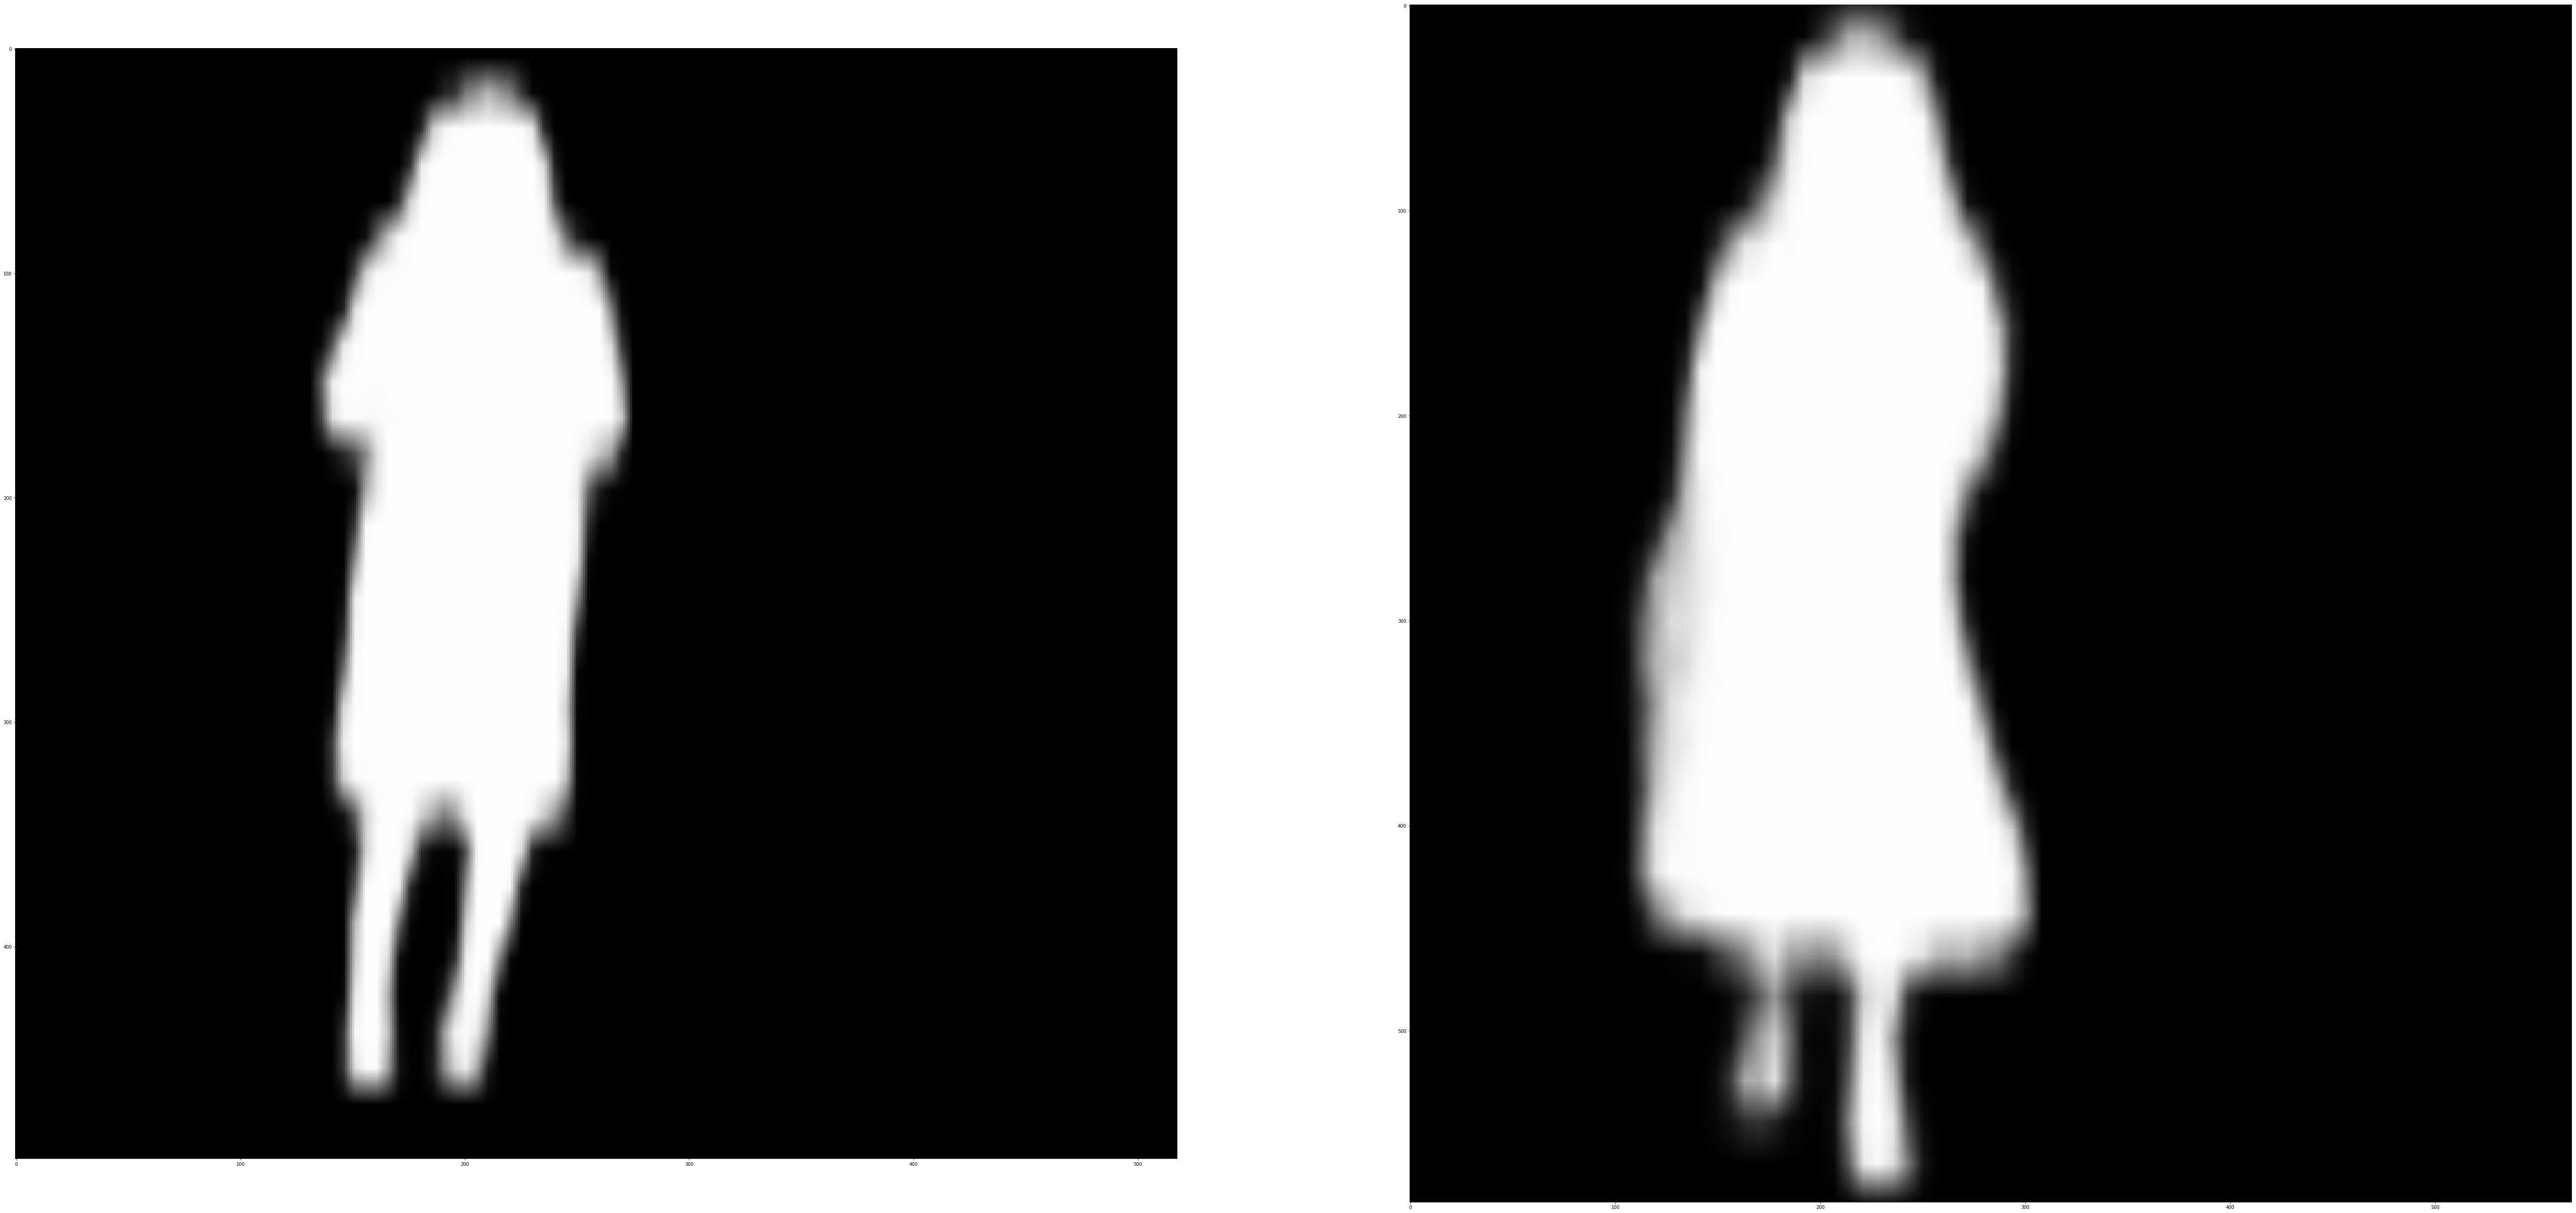

In [7]:
Plot(masks)